# 💡 ACLARACIONES DEL TRABAJO PRÁCTICO


Hemos implementado todas las funciones requeridas en los laboratorios. Sin embargo, para que el tiempo de ejecución del TP sea razonable, tuvimos que realizar optimizaciones en algunas de ellas.

⚡️ Optimización y Vectorización

Las optimizaciones implementadas se basan en la vectorización y la delegación de operaciones pesadas a librerías:

* Utilizamos el operador @ de NumPy en lugar de nuestra función manual multi_matricial.

* Utilizamos la función eigh importada (from scipy.linalg import eigh). Esta es la implementación de SciPy que calcula los autovalores y autovectores de una matriz hermitiana (simétrica), reemplazando nuestra funcion diagRH. Si bien intentamos optimizar nuestra implementación manual de diagRH, no logramos que corriera en un tiempo razonable  (siempre tardaba un googol de años).

📁 Estructura del Archivo alc.py
Dentro de la carpeta TP-ALC, encontrarán el archivo alc.py con todas las funciones implementadas. A continuación, un índice para facilitar la navegación:

* Si buscan '##': Encontraran el principio de una nueva seccion que puede ser:

* 'Laboratorio i' (reemplazando i por el número de labo): Contiene la implementación original de todas las funciones obligatorias de dicho laboratorio. Esta es la versión original que sigue los pseudo-códigos subidos al campus.

* 'Funciones necesarias para el Trabajo Practico': Contiene las funciones auxiliares implementadas para resolver las consignas del TP.

* Ejercicio i' (reemplazando i por el número de ej): Contiene las implementaciones de los ejercicios solicitados en la consigna del TP.

* 'Funciones optimizadas para poder correr el TP en un tiempo razonable': Contiene las optimizaciones que tuvimos que realizar. En su interior encontrarán comentarios sobre las partes modificadas para comparar la lógica original con la optimización (cálculos vectorizados, uso de @ o eigh).

# Imports para los ejercicios

In [ ]:
import alc

<module 'alc' from '/home/manu/Escritorio/TP alc/TP-ALC/alc.py'>

# Cargamos el dataset




In [ ]:
carpetaGatosYPerros = 'template-alumnos/dataset/cats_and_dogs'
Xt, Yt, Xv, Yv = cargarDataset(carpetaGatosYPerros)

NameError: name 'cargarDataset' is not defined

En la siguiente seccion generamos las matrices de pesos mediante los metodos requeridos por la catedra. Las funciones pinv generan las matrices de pesos calculando la pseudoinversa de la matriz de embeddings, por lo que hacemos un chequeo en cada funcion que determina si la matriz obtenida para calcular la matriz de pesos es o no la pseudoinversa. Notar que la matriz que se devuelve no es la pseudoinversa. 

# Generamos la matriz de pesos con Ecuaciones Normales

In [ ]:

# En el contexto del TP n < p, entonces para el algoritmo 1 aplicamos Cholesky sobre X @ X^T
print('Inició WEN')
tiempo_inicio_EN = time.perf_counter()
L = cholesky(multi_matricial(Xt, traspuesta(Xt)))
WEN, pXt_EN = pinvEcuacionesNormales(Xt, L , Yt)
tiempo_fin_EN = time.perf_counter()
print('Terminó WEN')

print(WEN.shape)
print(pXt_EN.shape)

# Verificamos si es pseudo-inversa
print('Es pseudo-inversa con EN: ', esPseudoInversa(Xt, pXt_EN))
matriz_de_confusion_EN = generarMatrizDeConfusion(WEN, Xv, Yv)

Inició WEN
X_t =  (2000, 1536)
L_t =  (1536, 1536)
n < p bien
Z =  (1536, 2000)
Vt =  (1536, 2000)


# Generamos la matriz de pesos con SVD

In [ ]:

print('Inició WSVD')
tiempo_inicio_SVD = time.perf_counter()
U, s_vector, V = svd_reducida_optimizado(Xt)
S = np.diag(s_vector)
WSVD,  pXt_SVD= pinvSVD(U, S, V, Yt)
tiempo_fin_SVD = time.perf_counter()
print('Terminó WSVD')
# Verificamos si es pseudo-inversa
print('Es pseudo-inversa con SVD: ', esPseudoInversa(Xt, pXt_SVD))
matriz_de_confusion_SVD = generarMatrizDeConfusion(WSVD, Xv, Yv)


Inició WSVD


KeyboardInterrupt: 

# Generamos la matriz de pesos con QR con Householder

In [ ]:
print('Inició WQRHH')
tiempo_inicio_QRHH = time.perf_counter()
QHH, RHH = QR_con_HH_optimizado(traspuesta(Xt))
WQRHH, pXt_QRHH = pinvHouseHolder(QHH, RHH, Yt)
tiempo_fin_QRHH = time.perf_counter()
print('Terminó WQRHH')
# Verificamos si es pseudo-inversa
print('Es pseudo-inversa con QRHH: ', esPseudoInversa(Xt, pXt_QRHH))
matriz_de_confusion_WQRHH = generarMatrizDeConfusion(WQRHH, Xv, Yv)


ValueError: No se pueden multiplicar: (2000, 1536) y (2000, 1536)

# Generamos la matriz de pesos con QR con Gram Schmidt

In [ ]:
print('Inició WQRGS')
tiempo_inicio_QRGS = time.perf_counter()
QGS, RGS = QR_con_GS(traspuesta(Xt))
WQRGS, pXt_QRGS = pinvGramSchmidt(QGS, RGS, Yt)
tiempo_fin_QRGS = time.perf_counter()
print('Terminó WQRGS')
# Verificamos si es pseudo-inversa
print('Es pseudo-inversa con QRGS: ', esPseudoInversa(Xt, pXt_QRGS))
matriz_de_confusion_WQRGS = generarMatrizDeConfusion(WQRGS, Xv, Yv)


Terminó WQRGS


# Generacion de graficos de comparacion


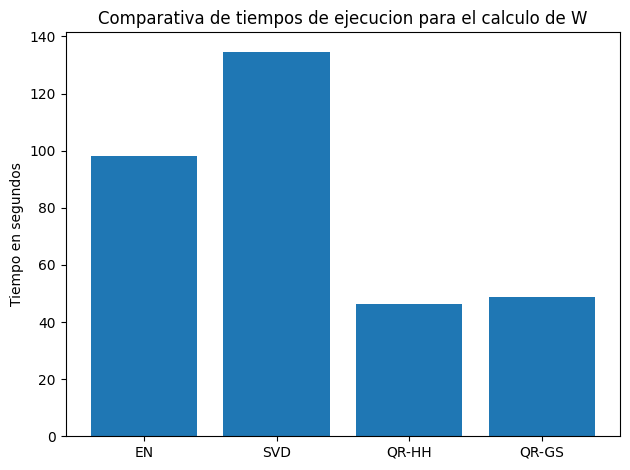

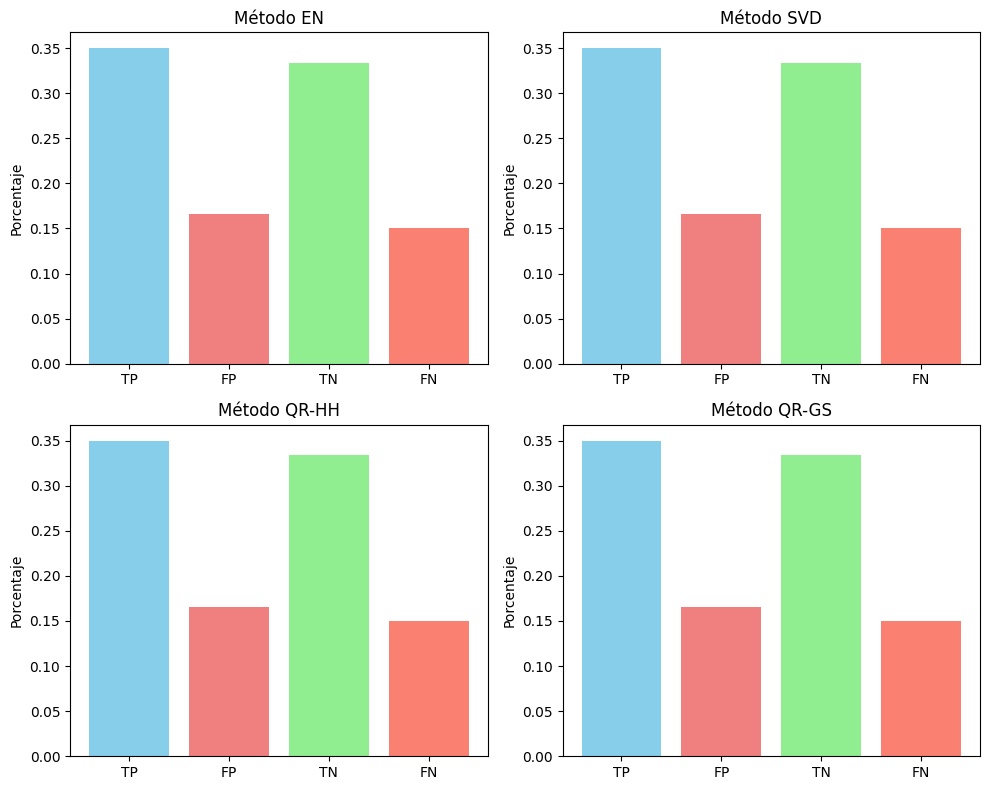

In [ ]:
#Graficos
metodos = ["EN", "SVD", "QR-HH", "QR-GS"]
TP_vals = []
FP_vals = []
TN_vals = []
FN_vals = []
#Tiempos
tiempos = [tiempo_fin_EN-tiempo_inicio_EN, tiempo_fin_SVD-tiempo_inicio_SVD, tiempo_fin_QRHH-tiempo_inicio_QRHH, tiempo_fin_QRGS-tiempo_inicio_QRGS]
plt.figure()
plt.bar(metodos, tiempos)
plt.ylabel("Tiempo en segundos")
plt.title("Comparativa de tiempos de ejecucion para el calculo de W")
plt.tight_layout()
plt.show()

for C in [matriz_de_confusion_EN, matriz_de_confusion_SVD, matriz_de_confusion_WQRHH, matriz_de_confusion_WQRGS]:
    TP, FP, TN, FN = extraerPorcentajes(C)
    TP_vals.append(TP)
    FP_vals.append(FP)
    TN_vals.append(TN)
    FN_vals.append(FN)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, metodo in enumerate(metodos):
    #Posicion en el grafico
    ax = axs[i // 2, i % 2]

    values = [TP_vals[i], FP_vals[i], TN_vals[i], FN_vals[i]]

    ax.bar(['TP', 'FP', 'TN', 'FN'], values, color=['skyblue', 'lightcoral', 'lightgreen', 'salmon'])

    ax.set_title(f'Método {metodo}')
    ax.set_ylabel('Porcentaje')

plt.tight_layout()
plt.show()

# Estimaciones de runtime de funciones sin optimizar


En esta seccion, vamos a hacer unas pequeñas estimaciones acerca de cuanto tardarian en terminar las funciones QR_con_HH y diagRH si en lugar de usar el @ usaramos nuestra implementacion de multi_matricial.

Comenzemos por QR_con_HH. Modificando el i en la siguiente seccion de codigo, se puede correr las primeras i iteraciones de la funcion para calcular un estimado de cuanto tardaria en terminar completamente.

Hay que tener en cuenta que a medida que avanzan las iteraciones, los calculos son menos costosos porque las matrices se achican. Para la estimacion, esto no lo tenemos en cuenta, simplemente hacemos un promedio de lo que tarda cada iteracion, y multiplicamos ese valor por la cantidad de iteraciones a realizar.

In [ ]:
i=1
runtimeQR, proyeccionQR = proyeccion_y_rt_QR_con_HH_sin_arroba(Xt, i)
print('Las primeras ', i, ' iteraciones de QR_con_HH utilizando nuestra multi_matricial tardaron: ', formatear_tiempo(runtimeQR))
print('Se estima que terminar todas las iteraciones tardaria: ', formatear_tiempo(proyeccionQR))

Ahora veamos que pasa si usamos multi_matricial en lugar de @ para calcular diagRH. Modificando el valor de K se puede variar la cantidad de iteraciones del metodo de la potencia. Modificando "numeroDeRecursiones" se puede variar la cantidad de pasos recursivos que realiza antes de cortar.

Tener en cuenta que la funcion recursiva tiene una etapa de "Ida" y otra de "Vuelta" y en ambas se realizan 3 multiplicaciones matriciales costosas. Como no podemos hacer ambas, hacemas las primeras "numeroDeRecursiones" idas y luego multiplicamos el resultado de la estimacion por 2.

Tambien hay que tener en cuenta que a medida que avanzan los pasos recursivos, los calculos son menos costosos porque las matrices se achican. Para la estimacion, esto no lo tenemos en cuenta, simplemente hacemos un promedio de lo que tarda cada "ida", y multiplicamos ese valor por 2 y por la cantidad de pasos recursivos a realizar.

In [ ]:
K = 1
numeroDeRecursiones = 1
runtimeRHsinArroba, proyeccionRHsinArroba = proyeccion_y_rt_diagRH_sin_arroba(Xt, K, numeroDeRecursiones)
print('Los primeros ', numeroDeRecursiones, ' pasos recursivos de diagRH utilizando nuestra multi_matricial, y K = ', K, ' para el metodo de la potencia, tardaron: ', formatear_tiempo(runtimeRHsinArroba))
print('Se estima que terminar todas las recursiones tardaria: ', formatear_tiempo(proyeccionRHsinArroba))

Por ultimo tenemos el caso de diagRH utilizando el @ en lugar de nuestra multi_matricial. Esto si bien no corre especialmente rapido (tarda unos 20 minutos), lo incluimos porque entendemos que la gracia del TP era utilizar las funciones que programamos nosotros. Sin embargo lo dejamos para el final porque tarda relativamente mucho comparado con los otros calculos de W y nos parecio mejor usar eigh de scipy.linalg para que todo este mass bien parejo.

Esta implementacion de diagRH, utiliza K=1 para el metodo de la potencia y @ en todas las multiplicaciones matriciales.

Observaciones sobre esta implementacion:
Surgieron algunos problemas. Uno es que la matriz es de 1536x1536, la recursion de python llega hasta poco menos de 1000.
Tuvimos que cambiar el limite de las recursiones a 2000 para tener un poco de margen y que ande.
No voy a negar que al hacer eso me crasheo la compu porque se quedo sin memoria y tuve que forzar un apagado jajaja.
Asi que tambien tuvimos que reducir el gasto de memoria, convirtiendo todo a float16 (consume unos 9GB de RAM). Esto implica que la claidad de esta W es muchisimo peor que las anteriores ya que utilizamos muchisima menos presicion. 

In [ ]:
tiempo_inicio_SVD_con_diagRH = time.perf_counter()
U, s_vector, V = svd_reducida_con_arroba(Xt)
S = np.diag(s_vector)
WSVD_con_diagRH = pinvSVD(U, S, V, Yt)
tiempo_fin_SVD_con_diagRH = time.perf_counter()
tiempo_SVD_con_diagRH = tiempo_fin_SVD_con_diagRH - tiempo_inicio_SVD_con_diagRH
print('Se calculó W utilizanco SVD con diagRH_con_arroba en: ', tiempo_SVD_con_diagRH)

# Sintesis Final

Al terminar este trabajo y analizar los gráficos, nos dimos cuenta de que todos los métodos predecían con el mismo porcentaje de acierto. Al principio nos pareció llamativo, pero despues recordamos que la pseudoinversa de una matriz es única. Por ende, las matrices de pesos W obtenidas mediante todos los métodos deben ser esencialmente las mismas. Esto ocurre porque, si bien implementamos distintas estrategias para calcular W, todas se basan en representar la pseudoinversa de la matriz de embeddings de una forma u otra. Por lo tanto, podemos afirmar que era totalmente esperable que las predicciones finales de los diferentes métodos fueran iguales. Aproximadamente entre un 67 % y un 68 % de las predicciones, independientemente del procedimiento de cálculo utilizado, son correctas.

Donde sí observamos un cambio significativo fue en el tiempo necesario de cada método para obtener las predicciones. Como se muestra en el primer gráfico, el método basado en SVD es el que más tarda, seguido por el de ecuaciones normales, y finalmente los dos métodos de factorización QR. Estos no son los tiempos que tardan los metodos al utilizar unicamente nuestro modulo, ya que en el algoritmo QR con Householder, en lugar de utilizar nuestra función de multiplicación de matrices, tuvimos que usar el operador @, ya que si hubiéramos usado nuestra implementacion, el algoritmo habría tardado alrededor de cinco horas. Además, también utilizamos eigh para el cálculo de autovalores y autovectores en el método SVD, ya que con nuestra implementación estimamos que tomaría aproximadamente veinte horas completar la tarea.

Teniendo todo esto en cuenta, podemos concluir que el método SVD es efectivamente el más lento, esto se debe a que requiere descomponer la matriz
X en tres matrices U, Σ y V, lo que implica calcular autovalores y autovectores de forma recursiva y costosa. Luego le sigue el método de Householder (en el grafico no se ve reflejado porque utilizamos el operador @), que, como vimos en clase, presenta un costo computacional mayor que el de Gram-Schmidt, pero es mas estable y tiene mayor precisión. Luego le sigue el método de ecuaciones normales, y finalmente, el método más rápido resultó ser Gram-Schmidt.